In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras import backend as K

Using TensorFlow backend.


## Load pre-trained model

In [2]:
# Load model trained on Imagenet
model = VGG16(weights='imagenet',include_top=False)

## Convert tensor in an image

In [3]:
def deprocess_image(x):
   # Normalize tensor
    x = x - np.mean(x) 
    x /= (x.std() + 1e-5)
    
    # std = 0.1
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # Convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255)
    x = x.astype('uint8')
    
    return x

## Generate filters visualizations

In [4]:
def generate_pattern(layer_name, filter_index, size=48):
    
    # Build loss function
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # Computes gradient
    grads = K.gradients(loss, model.input)[0]
    
    # Gradient normalization
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    # Create a noizy grayscale image
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    
    # Gradient ascent, 50 iterations
    for i in range(50):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    
    return deprocess_image(img)

## Plot 64 filter's pattern of four layer

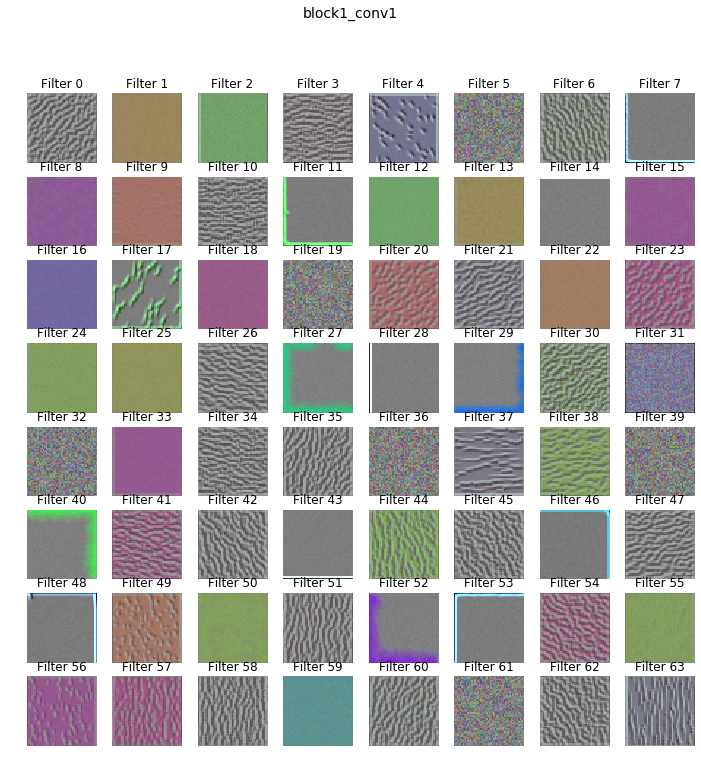

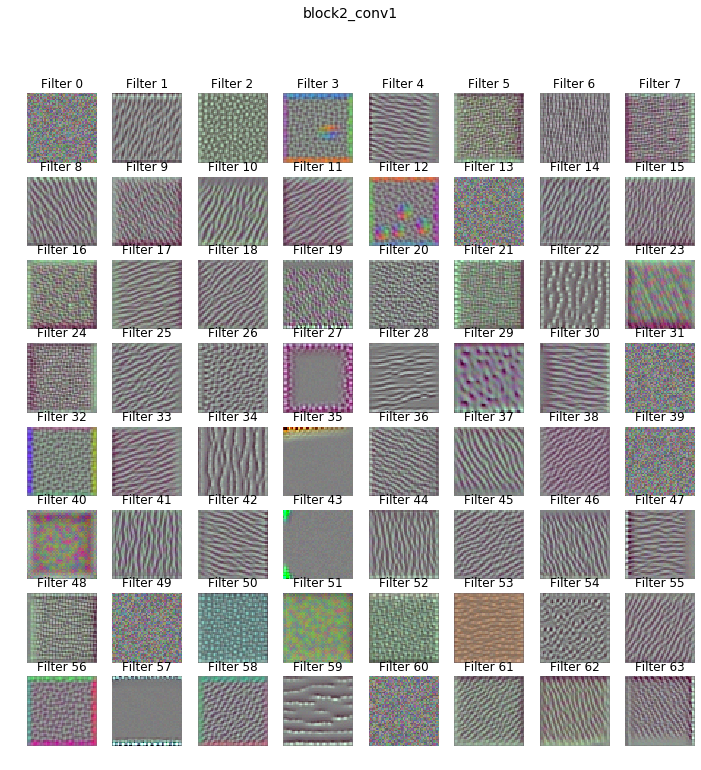

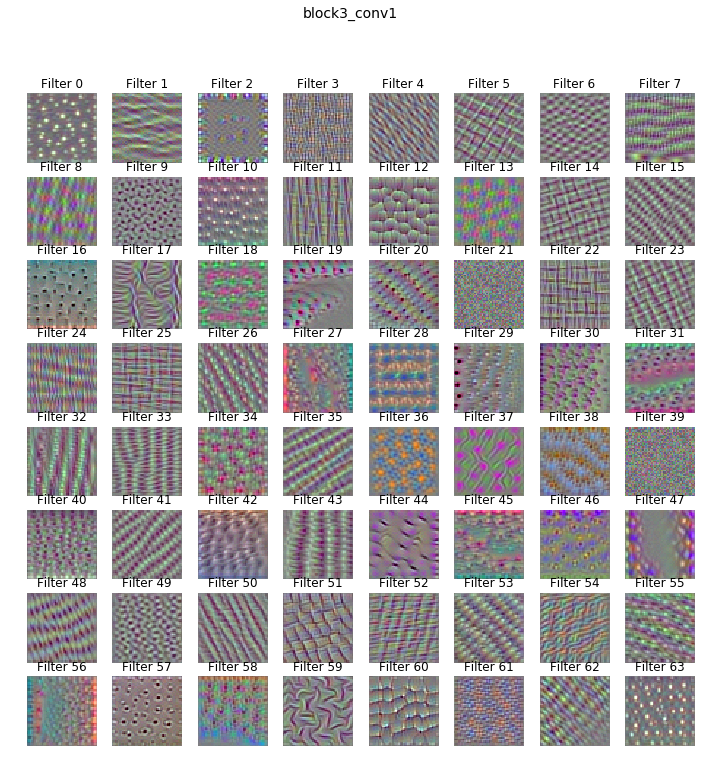

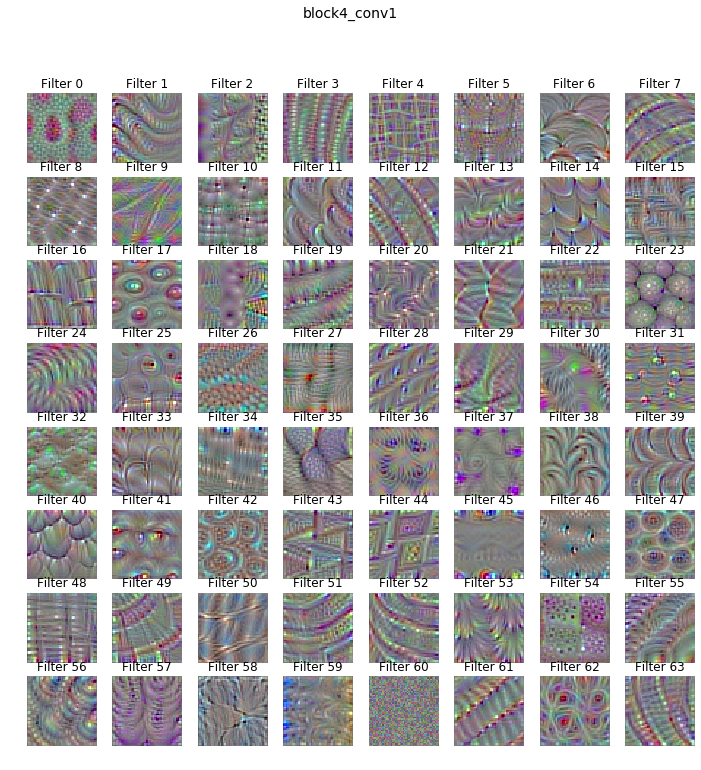

In [5]:
layer_name = ['block1_conv1','block2_conv1','block3_conv1','block4_conv1']

for layer in layer_name:
    plt.figure(figsize=(12,12))
    plt.suptitle(layer , fontsize=14)
    for index in range(0,64):
        plt.subplot(8,8,index+1)
        plt.title("Filter %d" %(index))
        plt.axis('off')
        plt.imshow(generate_pattern(layer,index))